In [1]:
import pandas as pd
import numpy as np

### 1.1. Download the dataset from Ukrainian Open Data Portal (dataset).

In [2]:
df = pd.read_csv("data_1.csv", sep=";")

### 1.2. Read the data, remove quotes, trailing whitespaces and tabs.

In [3]:
df.head()

,person,reg_addr_koatuu,oper_code,oper_name,d_reg,dep_code,dep,brand,model,make_year,color,kind,body,purpose,fuel,capacity,own_weight,total_weight,n_reg_new
0,P,2.310136e+09,530,530 - ЗНЯТТЯ З ОБЛIКУ ДЛЯ РЕАЛIЗАЦIЇ,2017-01-03,2341,Центр 2341,ВАЗ 210700-20,210700-20,2008,ЗЕЛЕНИЙ,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1451.0,1060.0,1460.0,08ВА8008
1,P,1.210138e+09,99,99 - ПЕРВИННА РЕЄСТРАЦІЯ ТЗ ПРИДБАНОГО В ТОРГІ...,2017-01-03,1248,Центр 1248,ПА 004,004,2015,ЗЕЛЕНИЙ,ПРИЧІП,ПР-ЛЕГКОВИЙ-B,ЗАГАЛЬНИЙ,NaN,NaN,190.0,700.0,АЕ3999ХМ
2,P,7.101000e+08,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2017-01-03,741,Центр 0741,SCHMITZ SPR 24L,SPR 24L,2003,ЧЕРВОНИЙ,НАПІВПРИЧІП,Н/ПР-БОРТОВИЙ-E,ЗАГАЛЬНИЙ,NaN,NaN,6694.0,35000.0,АС3826ХТ
3,P,7.101000e+08,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2017-01-03,741,Центр 0741,RENAULT PREMIUM 420,PREMIUM 420,2004,БІЛИЙ,ВАНТАЖНИЙ,СІДЛОВИЙ ТЯГАЧ-E,СПЕЦІАЛІЗОВАНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,11116.0,10880.0,24000.0,АС4142ВЕ
4,P,7.101000e+08,315,315 - ПЕРЕРЕЄСТРАЦІЯ ТЗ НА НОВ. ВЛАСН. ПО ДОГО...,2017-01-03,741,Центр 0741,WIELTON PC16K,PC16K,2004,СІРИЙ,ПРИЧІП,ПР-БОРТОВИЙ-ТЕНТОВАНИЙ,ЗАГАЛЬНИЙ,NaN,NaN,5050.0,18000.0,АС0397ХТ


### 1.3. Find and remove duplicates (if any),

In [4]:
df = df.drop_duplicates().reset_index().drop(columns=["index"])

### 1.4. Save a dictionary of unique operation codes and its meanings in external file (op_codes.txt). Column oper_name is redundant and we probably won’t need it in our data analysis, but it could be a good reference to better understand our data. Drop this column and think about any other redundant columns. If you find any, explain why you think of them being redundant?

In [5]:
# Create a list of unique names
op_mean = list(set(df.oper_name))

In [6]:
op_mean[0]

'401 - ПЕРЕРЕЄСТРАЦІЯ ТЗ ПРИ ПЕРЕОБЛАДНАННІ ІЗ ЗАМІНОЮ КУЗОВА (ШАСІ) ЗА ПОГОДЖЕННЯМ З ВИРОБНИКОМ, ДП ДЕРЖАВТОТРАНСНДІПРОЕКТ ЧИ ГСЦ МВС'

In [7]:
op_dict = {}
for pair in [op.split(" - ") for op in op_mean]:
    op_dict[pair[0]] = pair[1]

In [8]:
# Save dictionary to .txt file
f = open("op_codes.txt","w")
f.write(str(op_dict))
f.close()

In [9]:
df = df.drop(columns=["oper_code", "oper_name"])

In [10]:
df.head()

,person,reg_addr_koatuu,d_reg,dep_code,dep,brand,model,make_year,color,kind,body,purpose,fuel,capacity,own_weight,total_weight,n_reg_new
0,P,2.310136e+09,2017-01-03,2341,Центр 2341,ВАЗ 210700-20,210700-20,2008,ЗЕЛЕНИЙ,ЛЕГКОВИЙ,СЕДАН-B,ЗАГАЛЬНИЙ,БЕНЗИН,1451.0,1060.0,1460.0,08ВА8008
1,P,1.210138e+09,2017-01-03,1248,Центр 1248,ПА 004,004,2015,ЗЕЛЕНИЙ,ПРИЧІП,ПР-ЛЕГКОВИЙ-B,ЗАГАЛЬНИЙ,NaN,NaN,190.0,700.0,АЕ3999ХМ
2,P,7.101000e+08,2017-01-03,741,Центр 0741,SCHMITZ SPR 24L,SPR 24L,2003,ЧЕРВОНИЙ,НАПІВПРИЧІП,Н/ПР-БОРТОВИЙ-E,ЗАГАЛЬНИЙ,NaN,NaN,6694.0,35000.0,АС3826ХТ
3,P,7.101000e+08,2017-01-03,741,Центр 0741,RENAULT PREMIUM 420,PREMIUM 420,2004,БІЛИЙ,ВАНТАЖНИЙ,СІДЛОВИЙ ТЯГАЧ-E,СПЕЦІАЛІЗОВАНИЙ,ДИЗЕЛЬНЕ ПАЛИВО,11116.0,10880.0,24000.0,АС4142ВЕ
4,P,7.101000e+08,2017-01-03,741,Центр 0741,WIELTON PC16K,PC16K,2004,СІРИЙ,ПРИЧІП,ПР-БОРТОВИЙ-ТЕНТОВАНИЙ,ЗАГАЛЬНИЙ,NaN,NaN,5050.0,18000.0,АС0397ХТ


### 1.5. Translate at least 3 attributes’ values to english (color, kind, etc.).

In [11]:
set(df.color)

{'БІЛИЙ',
 'БЕЖЕВИЙ',
 'ЖОВТИЙ',
 'ЗЕЛЕНИЙ',
 'КОРИЧНЕВИЙ',
 'НЕВИЗНАЧЕНИЙ',
 'ОРАНЖЕВИЙ',
 'СІРИЙ',
 'СИНІЙ',
 'ФІОЛЕТОВИЙ',
 'ЧЕРВОНИЙ',
 'ЧОРНИЙ'}

In [12]:
colors = {'БІЛИЙ': 'white',
 'БЕЖЕВИЙ': 'beige',
 'ЖОВТИЙ': 'yellow',
 'ЗЕЛЕНИЙ': 'green',
 'КОРИЧНЕВИЙ': 'brown',
 'НЕВИЗНАЧЕНИЙ': 'unknown',
 'ОРАНЖЕВИЙ': 'orange',
 'СІРИЙ': 'grey',
 'СИНІЙ': 'blue',
 'ФІОЛЕТОВИЙ': 'purple',
 'ЧЕРВОНИЙ': 'red',
 'ЧОРНИЙ': 'black'}

In [13]:
set(df.kind)

{'АВТОБУС',
 'ВАНТАЖНИЙ',
 'КВАДРОЦИКЛ',
 'ЛЕГКОВИЙ',
 'МОПЕД',
 'МОТОЦИКЛ',
 'НАПІВПРИЧІП',
 'ПРИЧІП',
 'СПЕЦІАЛІЗОВАНІ',
 'ТРИЦИКЛ'}

In [14]:
vehicle_type = {'АВТОБУС': 'bus',
 'ВАНТАЖНИЙ': 'truck' ,
 'КВАДРОЦИКЛ': 'quadricycle' ,
 'ЛЕГКОВИЙ': 'car',
 'МОПЕД': 'motorbike',
 'МОТОЦИКЛ': 'motorcycle',
 'НАПІВПРИЧІП': 'semi-trailer',
 'ПРИЧІП': 'trailer',
 'СПЕЦІАЛІЗОВАНІ': 'special',
 'ТРИЦИКЛ': 'tricicle'}

In [15]:
set(df.purpose)

{'ЗАГАЛЬНИЙ', 'СПЕЦІАЛІЗОВАНИЙ', 'СПЕЦІАЛЬНИЙ'}

In [16]:
purpose = {'ЗАГАЛЬНИЙ': 'general', 'СПЕЦІАЛІЗОВАНИЙ': 'specialized', 'СПЕЦІАЛЬНИЙ': 'speial'}

In [17]:
df = df.replace({"color": colors, "kind": vehicle_type, "purpose": purpose})

In [18]:
df.head()

,person,reg_addr_koatuu,d_reg,dep_code,dep,brand,model,make_year,color,kind,body,purpose,fuel,capacity,own_weight,total_weight,n_reg_new
0,P,2.310136e+09,2017-01-03,2341,Центр 2341,ВАЗ 210700-20,210700-20,2008,green,car,СЕДАН-B,general,БЕНЗИН,1451.0,1060.0,1460.0,08ВА8008
1,P,1.210138e+09,2017-01-03,1248,Центр 1248,ПА 004,004,2015,green,trailer,ПР-ЛЕГКОВИЙ-B,general,NaN,NaN,190.0,700.0,АЕ3999ХМ
2,P,7.101000e+08,2017-01-03,741,Центр 0741,SCHMITZ SPR 24L,SPR 24L,2003,red,semi-trailer,Н/ПР-БОРТОВИЙ-E,general,NaN,NaN,6694.0,35000.0,АС3826ХТ
3,P,7.101000e+08,2017-01-03,741,Центр 0741,RENAULT PREMIUM 420,PREMIUM 420,2004,white,truck,СІДЛОВИЙ ТЯГАЧ-E,specialized,ДИЗЕЛЬНЕ ПАЛИВО,11116.0,10880.0,24000.0,АС4142ВЕ
4,P,7.101000e+08,2017-01-03,741,Центр 0741,WIELTON PC16K,PC16K,2004,grey,trailer,ПР-БОРТОВИЙ-ТЕНТОВАНИЙ,general,NaN,NaN,5050.0,18000.0,АС0397ХТ


### 1.6. Think about which column names are not clear enough and change them.

In [19]:
# It was hard to figure out what some columns mean, so after a research I have following assumptions

# This means if person is a legal or private entity (from Ukrainian  juridical/private person)
set(df.person)

{'J', 'P'}

In [20]:
# reg_addr_koatuu - Державний класифікатор об'єктів адміністративно-територіального устрою України (КОАТУУ)
# We need it to detect the region in Ukraine with specific cars

### 1.7. What is the possible usage of this data? Give 2-3 examples?

This data could be used to 
- predict cars that would be popular in Ukrainian market
- analyse cars demand (incluing year, model, brand)
- analyse type of fuel popular among different car types

### 1.8. Save the result of your work as a regular .csv file.

In [21]:
pd.DataFrame.to_csv(df, "cars_clean.csv")

### 1.9. What is the most popular car and car color in Ukraine?

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

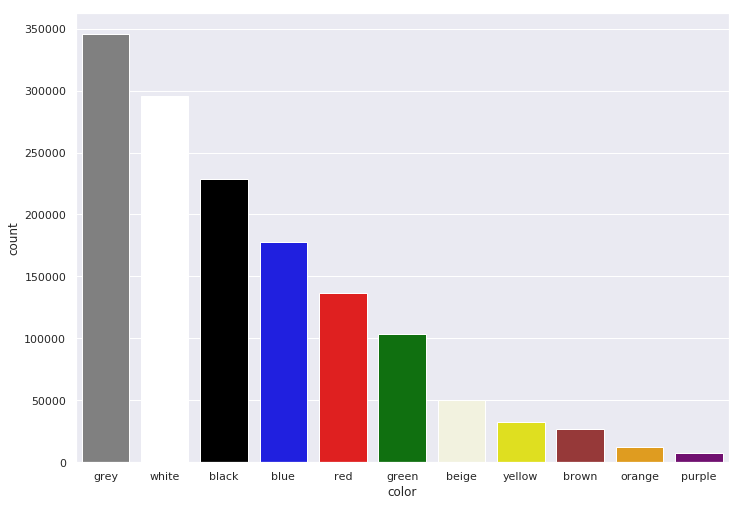

In [23]:
# Most popular color

sns.set(rc={'figure.figsize':(11.7,8.27)})
df_color_plot = df[df['color'] != "unknown"]
sns.countplot(df_color_plot['color'],
              order = df_color_plot['color'].value_counts().index,
              palette={color: color for color in df_color_plot['color'].unique()})

In [24]:
# Top 5 most popular car brands

brand_dic = df['brand'].value_counts().to_dict()
brand_names_top = list(brand_dic.keys())[:5]
brand_values_top = list(brand_dic.values())[:5]

In [25]:
brand_values_top

[26721, 22696, 18761, 16148, 14514]

<BarContainer object of 5 artists>

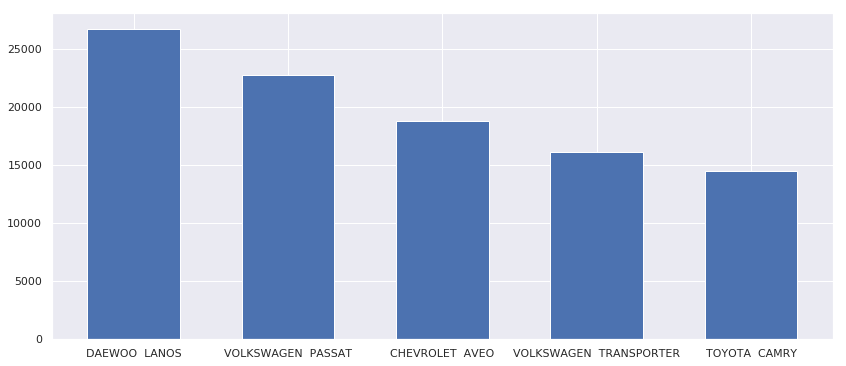

In [26]:
plt.figure(figsize=(14,6))
plt.bar(brand_names_top, brand_values_top, width=0.6)

In [27]:
# The most popular car brand and color

df['brand_color'] = df['brand'] + " " + df['color']

In [28]:
bc_dic = df['brand_color'].value_counts().to_dict()
bc_names_top = [i.split() for i in list(bc_dic.keys())[:10]]
bc_values_top = list(bc_dic.values())[:10]

In [29]:
bc_colors_top = [i[-1] for i in bc_names_top]
bc_brand_top = [" ".join(i[:-1]) + "\n" +i[-1].upper() for i in bc_names_top]

<BarContainer object of 10 artists>

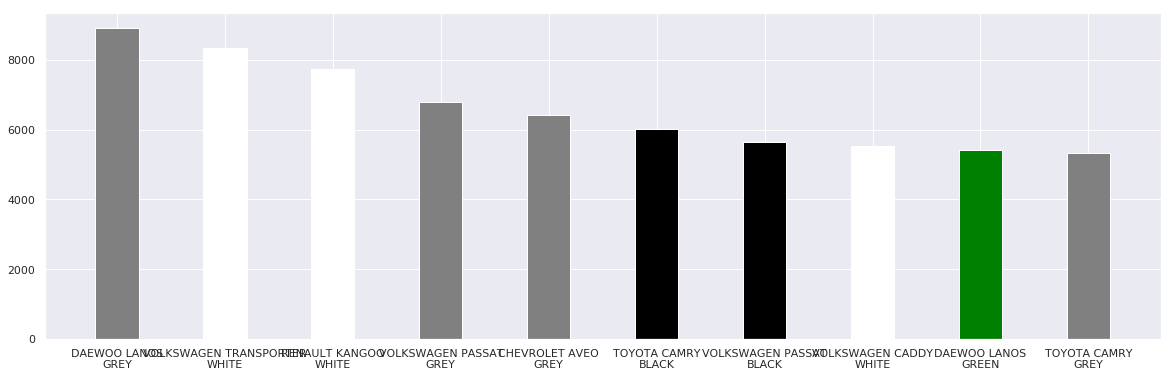

In [30]:
plt.figure(figsize=(20,6))
plt.bar(bc_brand_top, bc_values_top, width=0.4, color=bc_colors_top)